In [56]:
import pandas as pd
%matplotlib inline
import numpy as np
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import contractions
import string

In [57]:
def clean_text(row):
    all_lyrics_text=row
    
    #Tokenization
    token_all_text=nltk.word_tokenize(all_lyrics_text)
    final_token_text = [word for word in token_all_text if word.isalpha()]
    
    #Expand contractions
    text_no_contract=[contractions.fix(word) for word in final_token_text]
    
    #Remove stop words
    text_no_stp_contract=[word for word in text_no_contract if word.lower() not in stopwords]    
    
    #Lemmatization
    #no_stop_contract_lemma=[]
    #for word in text_no_stp_contract:
        #tag=nltk.pos_tag(word.split(" "))[0][1]
        #pos=get_pos_arg(tag)
        #no_stop_contract_lemma.append(wnetl.lemmatize(word,pos))

    lyrics_text="".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in text_no_stp_contract]).strip()
    return lyrics_text

In [63]:

scrape_df = pd.read_csv("scrape_data3.csv", usecols=np.r_[1:16], low_memory=False, encoding='utf-8', dtype={'Release Genre': str})
scrape_df.index = [x for x in range(1, len(scrape_df.values)+1)]
scrape_df.index.name = 'id'
scrape_df = scrape_df.drop_duplicates(subset = ["Release URL"])
scrape_df.dropna(inplace=True)

scrape_df

#cell_regex=nltk.RegexpTokenizer(pattern=r'\w+', gaps=False)
cell_regex=nltk.RegexpTokenizer("\\w+|[^\\w\\s]+", gaps=False)
scrape_df['Lyrics Tokens'] = scrape_df['All Lyrics'].apply(cell_regex)

#scrape_df= scrape_df.assign(Lyrics_Tokens='')
#for index, row in scrape_df.iterrows():
    #scrape_df.at[index, 'Lyrics Tokens']= clean_text(scrape_df.at[index,'All Lyrics'])
    
#scrape_df

TypeError: 'RegexpTokenizer' object is not callable

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1117 entries, 2 to 7884
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Release Genre      1117 non-null   object
 1   Release Sub-Genre  1117 non-null   object
 2   Search Format      1117 non-null   object
 3   Search Week        1117 non-null   object
 4   Search Category    1117 non-null   object
 5   Release URL        1117 non-null   object
 6   Scrape Date        1117 non-null   object
 7   Release Title      1117 non-null   object
 8   Artist Name        1117 non-null   object
 9   Artist Location    1117 non-null   object
 10  Release Date       1117 non-null   object
 11  Tags               1117 non-null   object
 12  Track Info         1117 non-null   object
 13  All Lyrics         1117 non-null   object
 14  Number of Tracks   1117 non-null   object
 15  Lyrics Tokens      1117 non-null   object
dtypes: object(16)
memory usage: 148.4+ KB


In [36]:
gen1 = 'pop'
gen2 = 'rock'
gen3 = 'hip-hop-rap'
comp1 = []
comp2 = []
comp3 = []

In [40]:
for index, row in scrape_df.iterrows():
    if gen1 in scrape_df.at[index,'Release Genre']:
        for w in scrape_df.at[index, 'Lyrics Tokens']:
            comp1.append(w)
    if gen2 in scrape_df.at[index,'Release Genre']:
        for w in scrape_df.at[index,'Lyrics Tokens']:
            comp2.append(w)
    if gen3 in scrape_df.at[index,'Release Genre']:
        for w in scrape_df.at[index,'Lyrics Tokens']:
            comp3.append(w)

478938

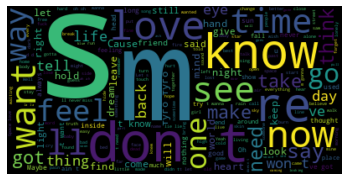

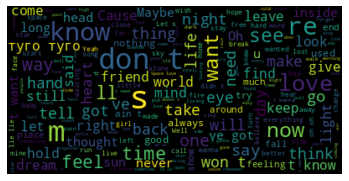

In [44]:
import matplotlib.pyplot as plt

wordcloud1 = WordCloud().generate(' '.join(comp1))

plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")

wordcloud1 = WordCloud(max_font_size=40).generate(' '.join(comp1))
plt.figure()
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")

plt.show()
